In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1) As per 538, the Jets have a 40% chance of winning next week's game. What distribution can we use to map out this experiment? What inputs will go into this distribution? What are the PMFs and CDFs of all of the possible outcomes in the sample space for this scenario?

In [2]:
#We can use a Bernoulli  Distribution because we're dealing an event of a single game/trial.
#Input 40% win rate and the number of trials ran (1 game).
dist = stats.bernoulli(p=0.4)

In [3]:
#PMF of 0
dist.pmf(0)

0.6

In [4]:
#PMF of 1
dist.pmf(1)

0.4

In [5]:
#CDF of 0
dist.cdf(0)

0.6

In [6]:
#CDF of 1
dist.cdf(1)

1.0

2) If there are 16 games in a season, and the Jets have a 40% chance of winning each game, what is the expected number of games that they will win (pretend the season hasn't started yet)? Please return the exact value if it's not an integer.

In [7]:
#Directly calculating the expeced value
dist.mean()*16

6.4

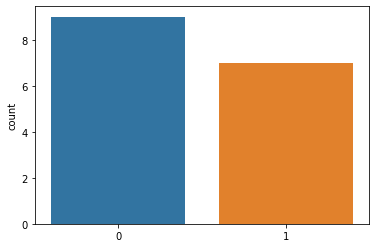

In [8]:
#Using a simulation for Q2
np.random.seed(42)
dist = stats.bernoulli(0.4)
random_numbers = dist.rvs(size=16)
sns.countplot(x=random_numbers)

In [9]:
#I got two different answers, one from direct calculation and the other from the simulation
np.sum(random_numbers)

7

3) What are the odds that they win 5 games or less this season? (again, pretend the season hasn't started yet)

In [10]:
#Using a gemotric function
dist = stats.geom(0.4)

In [11]:
#CDF plot for the 5 games
values = np.array([])
cdf_values = np.array([])
for i in range(6): #I don't know if I'm supposed to have range 17 (to account for 16 games)
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.binom.cdf(n=5, p=0.4, k=i)) #Similarly whether n should be 5 or 16

Text(0.5, 0.92, 'CDF Values for 5 games')

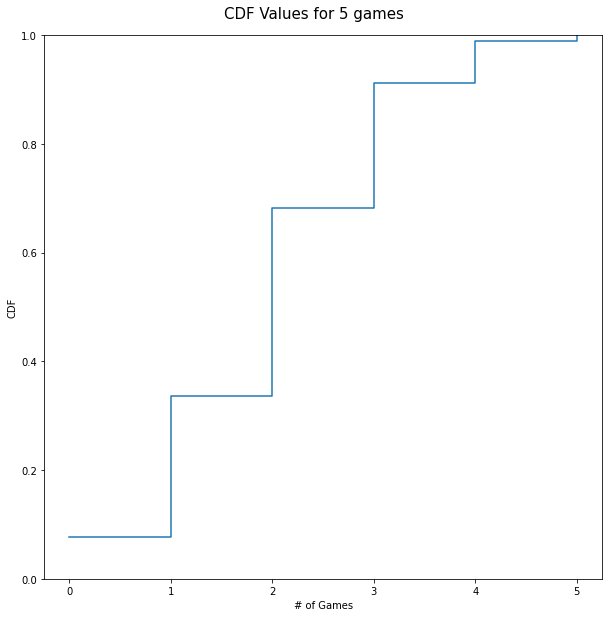

In [12]:
#Line graph
fig = plt.figure(figsize=(10,10))
plt.xticks(range(6))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Games')
plt.ylabel('CDF')
plt.ylim([0,1])
fig.suptitle('CDF Values for 5 games', fontsize=15, y=0.92)

In [13]:
#CDF of <=5
dist.cdf(5)

0.92224

4) What are the odds that it will take them exactly 3 games to win their first game?

In [14]:
dist.pmf(3)

0.144

5) What are the odds that it will take them at least 5 games to win their first game?

In [15]:
#I know a made a mistake here between Q3 and Q5
dist.cdf(5)

0.92224

6) Say they need to win 10 games or more to make the playoffs (out of 16). What are their odds of making the playoffs?

In [16]:
#Odds of winning 10 games or more
#My thought process here was calculate the CDF of 16 and calculate up to 9 wins, subtract them to obtain "10 games or more".
dist.cdf(16) - dist.cdf(9)

0.00979558500925437

7) Now find the PMF values of the Jets winning 0 - 16 games. Which result has the highest chance of occuring, and what is the PMF of that result?

In [17]:
np.random.seed(42)
for i in range(16):
    print(stats.bernoulli(p=0.4).rvs(16).sum() / 16)

0.4375
0.1875
0.375
0.375
0.4375
0.5
0.1875
0.625
0.25
0.375
0.3125
0.4375
0.625
0.4375
0.375
0.5


6 games -~20%

8) Using a seed of 42 (like below), simulate 100 16-game seasons for the Jets. Plot the histogram and boxplot for the result. What is the mean number of wins in your simulated 100 seasons? What is the median? What is the standard deviation? Is the mean the same or different than the expected number of games that they will win? Why or why not?

[1 6 3 2 1 1 1 4 2 3 1 7 4 1 1 1 1 2 2 1 2 1 1 1 2 4 1 2 2 1 2 1 1 6 7 4 1
 1 3 2 1 2 1 5 1 3 1 2 2 1 7 3 6 5 2 5 1 1 1 1 1 1 4 1 1 2 1 4 1 9 3 1 1 4
 3 3 3 1 1 1 4 2 1 1 1 1 3 2 5 2 1 3 3 2 3 2 2 2 1 1]


(array([46., 22., 13.,  8.,  0.,  4.,  3.,  3.,  0.,  1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

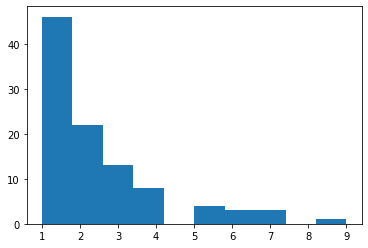

In [18]:
np.random.seed(42)

#Simulating 100 16-game seasons
results = dist.rvs(size=100)
print(results)

#Plotting Histogram
plt.hist(results)

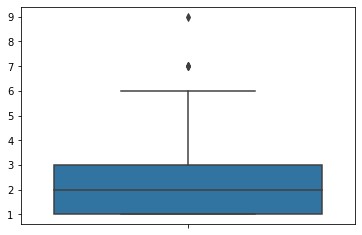

In [19]:
#Plotting boxplot
sns.boxplot(y=results)

In [20]:
#Mean
dist.mean()

2.5

In [21]:
#Median
dist.median()

2.0

In [22]:
#Standard Deviation
dist.std()

1.9364916731037083

In this context, where we treat probability and frequency the same, the mean and expected value are the same.

9) Imagine they made the playoffs. Wow! Now the odds of winning each game has gone down to 25% because the competition is harder. They need to win all four games remaining to win the Super Bowl. What are their odds of winning the Super Bowl?

In [23]:
#New probabilty 25%, still using Bernoulli distribution
dist = stats.bernoulli(p=0.25)

In [24]:
#Odds of winning all 4 games
dist.pmf(1)/4

0.0625

10) Given what we discussed in class, why might this example not follow a binomial distribution? Or - what would cause it to not follow a binomial distribution?

Losing a non-final game will prevent them from playing the next game.
i.e. the result of the "prior" trial/game affecs the probability of the next.

11) Say that, as per polling, that Joe Biden has a 50% chance of winning the Iowa primary in February. If I poll ten voters, what is the probability that exactly five of them will vote for him?

In [25]:
#I realise that this is the same idea as the coin flip scenario but I'm not sure how to go about it.
#Voting for Biden = 1, not voting for him = 0
dist = stats.bernoulli(p=0.5)

In [26]:
#Probability that exactly 5/10 will vote for Biden (50%)
dist.pmf(1)/2

0.25

12) What is the probabilty that between three and five of the voters will vote for him?

In [27]:
#Using CDF and subtracting to get the "in between" 3 & 5
dist.cdf(0)*5 - dist.cdf(0)*3

1.0

13) What are the odds that the second person I ask will vote for Joe Biden?

0.5

14) What are the odds that the second person I ask is the first person I speak to who will vote for Joe Biden?

Probability of first person not voting for him (0.5) and the second person voting for Biden (0.5)
0.5*0.5 = 0.25

15) Stock A has a 70% chance of going down next year, which would cost your portfolio \\$100,000 if that were to happen. It has a 30% chance of going up, which would bring $500,000 to your portfolio. Should you invest in Stock A? What is your expected net return in this scenario? 

Event | Odds | Payout | Total Value
Stock drops | 70% | -100,000 | -70,000 
Stock Rises | 30% | 500,000| 150,000

Expected Net Value: 80,000 dollars
    
Yes, invest in Stock A.